In [7]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#import relevant libraries

import pandas as pd
import IPython.display as IPD

In [9]:
#Reading the CSV files of Author, Articles and Paper counts

article_df = pd.read_csv('/content/drive/MyDrive/skills-assessment-2/articles.HLA-A.csv')
author_df = pd.read_csv('/content/drive/MyDrive/skills-assessment-2/authors.HLA-A.csv')
paper_counts_df = pd.read_csv('/content/drive/MyDrive/skills-assessment-2/paper_counts.csv')

In [10]:
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ..."
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,DM,Department of Histocompatibility and Immunogen...
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,GM,"World Marrow Donor Association, Leiden, The Ne..."
...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian..."
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ..."
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T..."
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad..."


In [11]:
#Adding the FullName column for the missing values count and for the further analysing purpose because this dataframe has so many similar Lastnames.

article_df['FullName_1'] = article_df['FirstAuthorForename'].astype(str) + ' ' + article_df['FirstAuthorLastname'].astype(str)

# Displaying the Dataframe with the FullName column
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...,F Williams
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ...",L Norgaard
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,DM,Department of Histocompatibility and Immunogen...,D M Turner
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,GM,"World Marrow Donor Association, Leiden, The Ne...",G M Schreuder
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón


Finding the missing count of values in articles dataframe

In [12]:
articles_missing_count = article_df.isnull().sum()
IPD.display(articles_missing_count)

PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  23
Year                       0
FirstAuthorForename        4
FirstAuthorLastname        3
FirstAuthorInitials       11
FirstAuthorAffiliation    39
FullName_1                 0
dtype: int64

Removing the missing values rows based on the important data(PMID,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials)



In [13]:
# Dropping rows where 'PMID', 'Year', 'FirstAuthorForename', or 'FirstAuthorLastname' are missing in the articles dataframe
articles_df = article_df.dropna(subset=['PMID', 'Year', 'FirstAuthorForename', 'FirstAuthorLastname','FirstAuthorInitials'])
missing_values_cleaned_articles = articles_df.isnull().sum()
IPD.display(missing_values_cleaned_articles)

PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  22
Year                       0
FirstAuthorForename        0
FirstAuthorLastname        0
FirstAuthorInitials        0
FirstAuthorAffiliation    36
FullName_1                 0
dtype: int64

Displaying the Article dataframe after removing the missing value rows

In [14]:
IPD.display(articles_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...,F Williams
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ...",L Norgaard
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,DM,Department of Histocompatibility and Immunogen...,D M Turner
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,GM,"World Marrow Donor Association, Leiden, The Ne...",G M Schreuder
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón


Printing the published papers count for every years

In [15]:
# Counting the number of papers published each year
papers_published_per_year = articles_df['Year'].value_counts().sort_index()

# Displaying the count of papers published each year
print(papers_published_per_year)

1979      3
1980      9
1983      1
1984      1
1985      1
1991      1
1992      3
1994      1
1996      3
1997      3
1998      3
1999     40
2000    174
2001    188
2002    181
2003    178
2004    180
2005    198
2006    176
2007    230
2008    182
2009    183
2010    196
2011    238
2012    241
2013    236
2014    225
2015    224
2016    248
2017    196
2018    206
2019    198
2020    257
2021    248
2022    250
2023    232
2024      1
Name: Year, dtype: int64


Displaying the author dataframe

In [16]:
IPD.display(author_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551415,2,Y,Ishikawa,Y,NaN
2,10551415,3,T,Dumrese,T,NaN
3,10551415,4,K,Tokunaga,K,NaN
4,10551415,5,T,Juji,T,NaN
...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive..."
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio..."
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio..."


Finding the missing values count of author dataframe

In [17]:
authors_missing_count = author_df.isnull().sum()
IPD.display(authors_missing_count)

PMID                     0
AuthorN                  0
AuthorForename           5
AuthorLastname           0
AuthorInitials          37
AuthorAffiliation    21077
dtype: int64

Adding the column FullName by adding Forename and Lastname of the researchers using astype(str) to find the Publication count for the analysis part.

In [18]:
# creating copy dataframe for authors to avoid copy slice errors because it was showing error like that while running without the copy dataframe
author_df = author_df.copy()

#Creating the full name column
author_df['FullName'] = author_df['AuthorForename'].astype(str) + ' ' + author_df['AuthorLastname'].astype(str)

# Displaying the DataFrame with the 'FullName' column
author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada
1,10551415,2,Y,Ishikawa,Y,NaN,Y Ishikawa
2,10551415,3,T,Dumrese,T,NaN,T Dumrese
3,10551415,4,K,Tokunaga,K,NaN,K Tokunaga
4,10551415,5,T,Juji,T,NaN,T Juji
...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",Josefina G Ancona-León
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Gicel Gutiérrez-Torres
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",Jongmin Kim
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",Kyung-Hwa Shin


Clearing the missing value rows based on the unavilability of data(PMID,AuthorForname,AuthorLastname and AuthorInitials)

In [19]:
# Dropping rows where 'PMID', 'Year', 'AuthorForename', or 'AuthorLastname' are missing in the authors dataframe
authors_df = author_df.dropna(subset=['PMID','AuthorForename', 'AuthorLastname','AuthorInitials'])
missing_values_cleaned_authors = authors_df.isnull().sum()
IPD.display(missing_values_cleaned_authors)

PMID                     0
AuthorN                  0
AuthorForename           0
AuthorLastname           0
AuthorInitials           0
AuthorAffiliation    21060
FullName                 0
dtype: int64

Displaying the author dataframe after clearing the missing values

In [20]:
IPD.display(authors_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada
1,10551415,2,Y,Ishikawa,Y,NaN,Y Ishikawa
2,10551415,3,T,Dumrese,T,NaN,T Dumrese
3,10551415,4,K,Tokunaga,K,NaN,K Tokunaga
4,10551415,5,T,Juji,T,NaN,T Juji
...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",Josefina G Ancona-León
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Gicel Gutiérrez-Torres
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",Jongmin Kim
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",Kyung-Hwa Shin


Displaying the paper_counts dataframe

In [21]:
IPD.display(paper_counts_df)

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


Finding the missing value

In [22]:
papers_missing_count = paper_counts_df.isnull().sum()
IPD.display(papers_missing_count)

Year     0
Count    0
dtype: int64

Plotting the Paper_counts dataframe with year and count

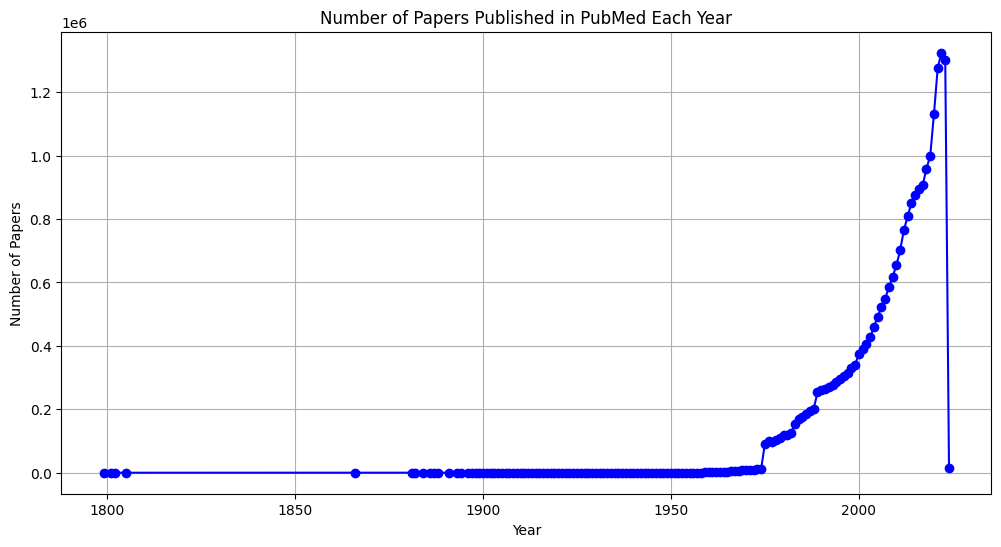

In [23]:
import matplotlib.pyplot as plt

# Plotting a time series graph for the paper counts
plt.figure(figsize=(12, 6))
plt.plot(paper_counts_df['Year'], paper_counts_df['Count'], marker='o', linestyle='-', color='b')
plt.title('Number of Papers Published in PubMed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

Finding the top authors using the Author dataframe by FullName and publication count

In [24]:
# Counting publications for each author considering their FullName
full_name_publication_counts = authors_df.groupby(['FullName']).size().reset_index(name='PublicationCount')

# Sorting the authors based on their publication count from the year 1999-2024
Publication_counts = full_name_publication_counts.sort_values(by='PublicationCount', ascending=False)
Publication_counts

,FullName,PublicationCount
19071,P Y Lin,58
12521,K L Yang,54
12204,Julio Granados,42
13577,Kuo-Liang Yang,39
6548,Esteban Arrieta-Bolaños,38
...,...,...
10460,J R Yannelli,1
10459,J R Wyer,1
10458,J R Wunderlich,1
10456,J R Turton,1


Creating the top 20 activite researchers dataframe from 1979-2024

In [25]:
# Displaying top authors from the year 1979-2024
top_20_active_researchers = Publication_counts.head(20)
top_20_active_researchers

,FullName,PublicationCount
19071,P Y Lin,58
12521,K L Yang,54
12204,Julio Granados,42
13577,Kuo-Liang Yang,39
6548,Esteban Arrieta-Bolaños,38
19792,Py-Yu Lin,37
20855,Rodrigo Barquera,37
6027,Edmond J Yunis,37
26668,Yasuo Morishima,36
11596,Joaquín Zúñiga,35


Using barplot to show the counts of publications of the top 20 researchers from 1979 to 2024

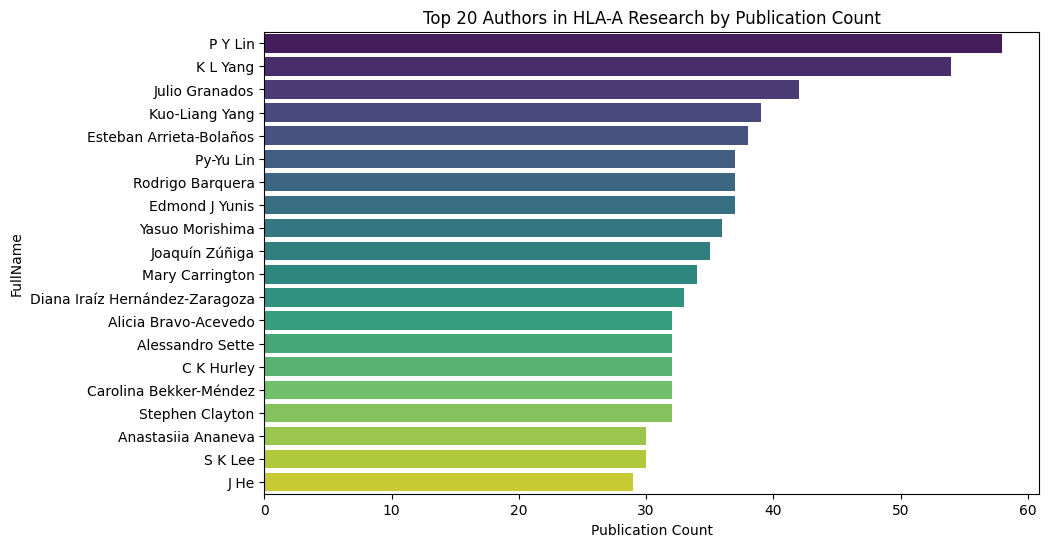

In [26]:
#importing seaborn for the visualisation
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='PublicationCount', y='FullName', hue='FullName', data=top_20_active_researchers, palette='viridis')
plt.title('Top 20 Authors in HLA-A Research by Publication Count')
plt.xlabel('Publication Count')
plt.show()

Creating the network based on the Full Name from top_20_active_researchers with the authors df to find the co-authors by using pmid

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
# Creating the subset of the authors dataframe focusing on the top authors
top_author_names = top_20_active_researchers['FullName'].tolist()
top_20_active_researchers = authors_df[authors_df['FullName'].isin(top_author_names)]

# Creating the co-authorship network by considering fullnames with use of pmid
G_full_name = nx.Graph()
for pmid, group in top_20_active_researchers.groupby('PMID'):
    authors = group['FullName'].tolist()
    for author in authors:
        if author not in G_full_name:
            G_full_name.add_node(author)
        for coauthor in authors:
            if author != coauthor:
                G_full_name.add_edge(author, coauthor)

# Extracting connected components (collaboration networks)
connected_components = list(nx.connected_components(G_full_name))
#printing the connected components
connected_components

[{'C K Hurley', 'J He'},
 {'Alicia Bravo-Acevedo',
  'Carolina Bekker-Méndez',
  'Diana Iraíz Hernández-Zaragoza',
  'Edmond J Yunis',
  'Esteban Arrieta-Bolaños',
  'Joaquín Zúñiga',
  'Julio Granados',
  'Rodrigo Barquera',
  'Stephen Clayton'},
 {'Alessandro Sette', 'Mary Carrington', 'Yasuo Morishima'},
 {'K L Yang', 'P Y Lin', 'S K Lee'},
 {'Kuo-Liang Yang', 'Py-Yu Lin'},
 {'Anastasiia Ananeva'}]

plotting the network diagram to understand better

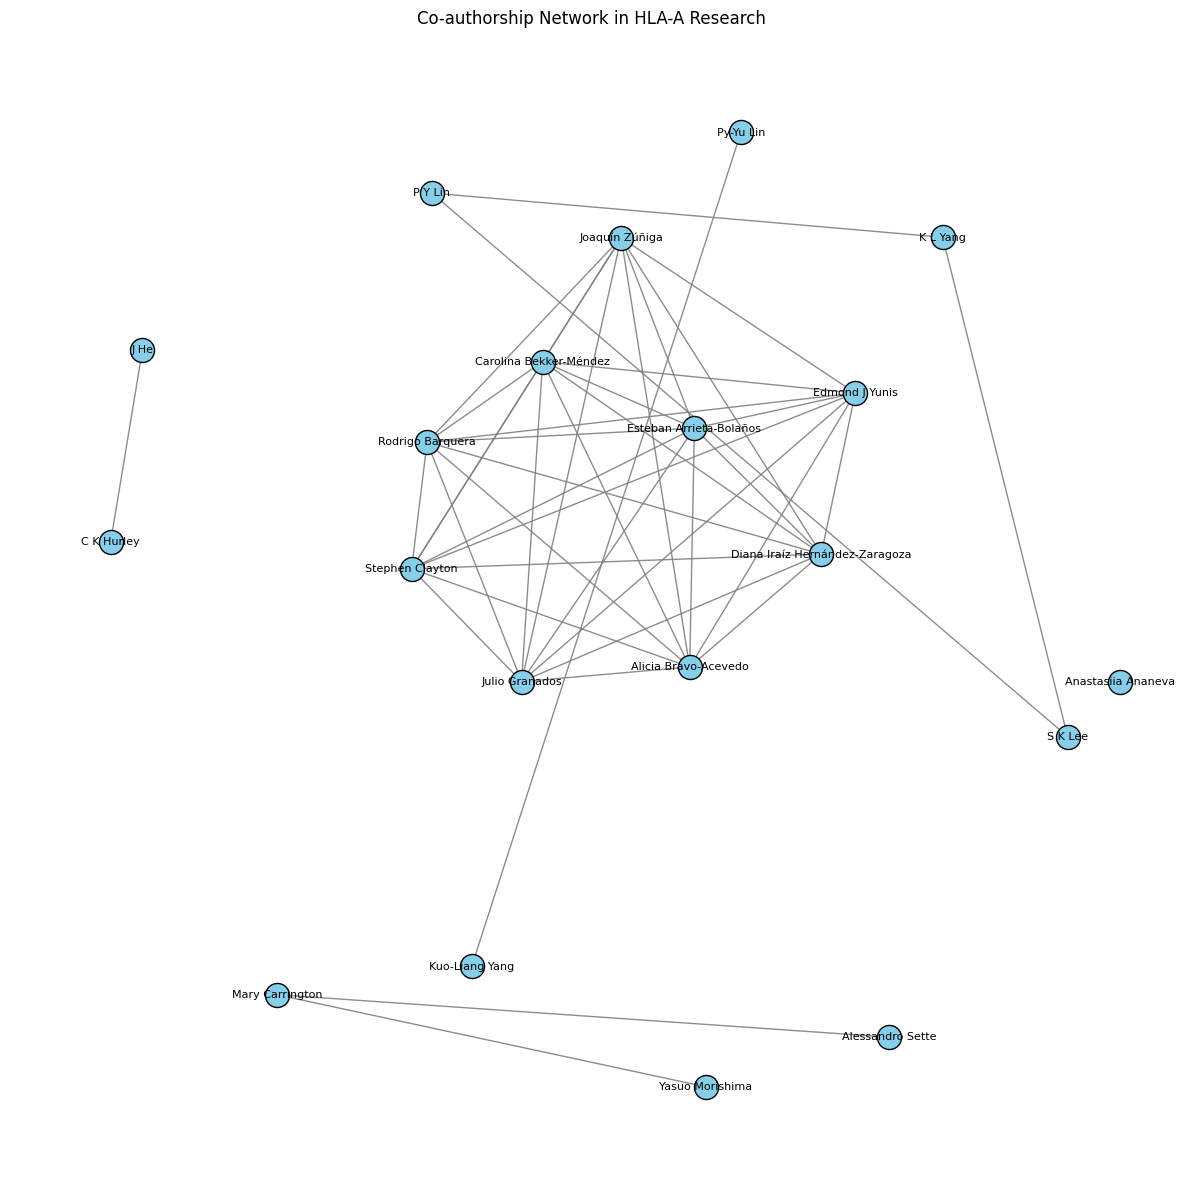

In [28]:
# Drawing the network graph with spacing
plt.figure(figsize=(15, 15))
# Increasing the 'k' parameter to increase repulsive force between nodes
pos = nx.spring_layout(G_full_name, k=3.0, iterations=100)

# Drawing the nodes and edges
nx.draw_networkx_nodes(G_full_name, pos, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G_full_name, pos, edge_color='gray', alpha=0.9)

# Drawing the labels
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center')

# Giving the  title and remove axis
plt.title("Co-authorship Network in HLA-A Research")
plt.axis('off')

# Show the plot
plt.show()

In [30]:
#merging the articles dataframe 'year' with the author dataframe by using the PMID
merged_df = authors_df.merge(articles_df[['PMID', 'Year']], on='PMID')

IPD.display(merged_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName,Year
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada,1999
1,10551415,2,Y,Ishikawa,Y,NaN,Y Ishikawa,1999
2,10551415,3,T,Dumrese,T,NaN,T Dumrese,1999
3,10551415,4,K,Tokunaga,K,NaN,K Tokunaga,1999
4,10551415,5,T,Juji,T,NaN,T Juji,1999
...,...,...,...,...,...,...,...,...
42812,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",Josefina G Ancona-León,2023
42813,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Gicel Gutiérrez-Torres,2023
42814,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",Jongmin Kim,2023
42815,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",Kyung-Hwa Shin,2023


In [31]:
#paper counts for each year from 1979-2024

papers_published_per_year_1 = merged_df['Year'].value_counts().sort_index()

# Display the count of papers published each year
IPD.display(papers_published_per_year_1)

1979      18
1980      37
1983       4
1984       1
1985       1
1991       6
1992      22
1994      14
1996      15
1997      20
1998      11
1999     249
2000    1165
2001    1385
2002    1292
2003    1305
2004    1444
2005    1521
2006    1419
2007    1922
2008    1362
2009    1454
2010    1707
2011    2054
2012    2010
2013    2144
2014    1925
2015    1996
2016    2179
2017    1730
2018    1788
2019    1906
2020    2612
2021    1916
2022    2207
2023    1974
2024       2
Name: Year, dtype: int64

In [32]:
#publication trends of top 20 active researchers from 1979-2024

top_20_full_names = top_20_active_researchers['FullName']

# filtering the 'merged_df' for the top 20 researchers
top_20_publication_activity = merged_df[merged_df['FullName'].isin(top_20_full_names)]

# And we can able to filter for the recent years
recent_years_cutoff = merged_df['Year'].max() - 10
top_20_recent_publication_activity = top_20_publication_activity[top_20_publication_activity['Year'] >= recent_years_cutoff]

# Counting publications per year for each of the top 20 authors over the last 10 years
print('publications per year for each of the top 20 authors over the last 10 years')
top_20_publication_trends = top_20_recent_publication_activity.groupby(['FullName', 'Year']).size().unstack(fill_value=0)

IPD.display(top_20_publication_trends)

publications per year for each of the top 20 authors over the last 10 years


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
FullName,,,,,,,,,,
Alessandro Sette,1,2,2,1,4,0,1,0,0,0
Alicia Bravo-Acevedo,0,0,0,0,0,1,31,0,0,0
Anastasiia Ananeva,0,0,0,0,0,0,1,4,2,23
C K Hurley,0,0,0,1,1,0,0,0,0,0
Carolina Bekker-Méndez,0,0,0,0,0,1,31,0,0,0
Diana Iraíz Hernández-Zaragoza,0,0,0,0,0,1,32,0,0,0
Edmond J Yunis,0,0,0,0,0,0,30,0,0,0
Esteban Arrieta-Bolaños,0,0,0,0,0,5,30,0,0,1
J He,2,5,9,0,2,0,0,0,0,0
